<a href="https://colab.research.google.com/github/Hidenaga41/timeseries/blob/master/Timeseries1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.4 加法モデルと乗法モデル

何位も加工していない時系列データは傾向変動 Trend variation 季節変動 Seadonal Variation 不規則変動Irregular variation の3つの変動成分に分解できる．

時系列データを3つの基本成分の合成であると考えるときに， 合成の仕方として
加法モデル Assitive model
乗法モデル Multiplicative model

原系列データをO(t) とすると，傾向変動，季節変動，不規則変動を
O(t) = T(t)+S(t)+I(t)
O(t) = T(t)*S(t)*I(t)
と洗わせる．

不規則変動は，傾向変動と季節変動では表現できなかった残差に相当するものであるため，傾向変動及び，季節変動のみで原系列を復元することを考える．

# 1.5 移動平均（時系列変動の平滑化）

ノイズの除去には時系列変動のスムージングSmoothingを行い誤算変動をキャンセルアウトする事が有効である．

## 1.5.1 平滑化
移動平均法 Moving average method
移動中心値法 Running median method
がある．




In [ ]:
# １．５．２ 移動平均の例

https://www.mizuhobank.co.jp/market/csv/quote.csv

In [1]:
import re
import os
import glob
from shapely.geometry import Point
from geopy import distance
import json
import pandas as pd
import requests
import folium
import matplotlib.pyplot as plt
import numpy as np
import folium.plugins as plugins
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import requests
import io
import pandas as pd

response = requests.get('https://www.mizuhobank.co.jp/market/csv/m_quote.csv')

file_object = io.StringIO(response.content.decode('shift-JIS'))
df = pd.read_csv(file_object, header=1)
df.head()

,Unnamed: 0,USD,GBP,EUR,CAD,CHF,SEK,DKK,NOK,AUD,NZD,ZAR,BHD,IDR(100),CNY,HKD,INR,MYR,PHP,SGD,KRW(100),THB,KWD,SAR,AED,MXN,PGK,HUF,CZK,PLN,RUB,TRY,IDR(100).1,CNY.1,MYR.1,KRW(100).1,TWD
0,2002/4/30,131.15,189.01,115.97,82.83,79.13,12.73,15.61,15.20,70.24,58.08,11.83,348.32,*****,*****,16.82,2.69,*****,2.58,71.64,9.99,3.02,429.50,34.98,35.71,14.36,*****,*****,*****,*****,NaN,NaN,1.39,15.84,*****,9.99,3.77
1,2002/5/31,126.44,184.56,115.88,81.58,79.60,12.57,15.59,15.43,69.58,58.38,12.51,335.97,*****,*****,16.21,2.60,*****,2.54,70.23,10.1,2.96,417.48,33.73,34.43,13.30,*****,*****,*****,*****,NaN,NaN,1.41,15.28,*****,10.10,3.68
2,2002/6/28,123.53,183.00,117.83,80.64,80.09,12.94,15.86,15.92,70.29,60.48,12.22,328.37,*****,*****,15.84,2.54,*****,2.46,69.27,10.2,2.93,410.12,32.96,33.64,12.67,*****,*****,*****,*****,NaN,NaN,1.44,14.93,*****,10.20,3.66
3,2002/7/31,118.05,183.64,117.23,76.52,80.16,12.67,15.79,15.83,65.42,56.82,11.73,313.77,*****,*****,15.13,2.43,*****,2.34,67.35,9.98,2.86,393.79,31.49,32.15,12.07,*****,*****,*****,*****,NaN,NaN,1.34,14.26,*****,9.98,3.56
4,2002/8/30,119.08,183.14,116.45,75.85,79.60,12.59,15.69,15.68,64.47,55.28,11.31,316.39,*****,*****,15.27,2.46,*****,2.31,67.82,9.97,2.83,396.92,31.77,32.43,12.12,*****,*****,*****,*****,NaN,NaN,1.35,14.39,*****,9.97,3.53


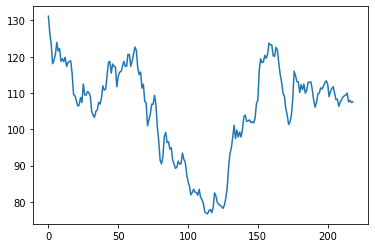

In [24]:
df.USD.plot()

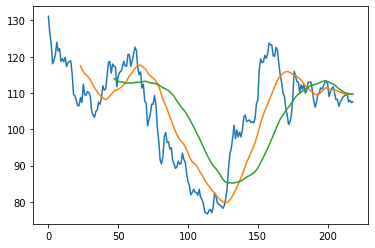

In [28]:
df.USD.plot()
df.USD.rolling(24).mean().plot()
df.USD.rolling(48).mean().plot()

In [30]:
# 中心化移動平均

response = requests.get('https://oku.edu.mie-u.ac.jp/~okumura/stat/data/icecream.csv')

file_object = io.StringIO(response.content.decode('shift-JIS'))
df_ice = pd.read_csv(file_object, header=1)
df_ice.head()

,年,月,アイスクリーム
0,2003,1,331
1,2003,2,268
2,2003,3,365
3,2003,4,492
4,2003,5,632


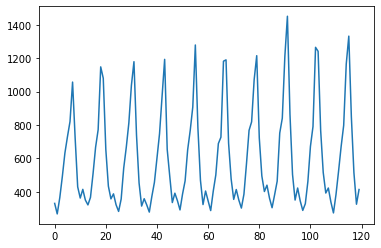

In [31]:
df_ice['アイスクリーム'].plot()

In [34]:
df_ma = df_ice['アイスクリーム'].rolling(12).mean().shift(-6)
df_cma = df_ma.rolling(2).mean()

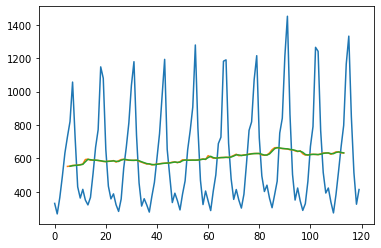

In [36]:
df_ice['アイスクリーム'].plot()
df_ma.plot()
df_cma.plot()

## 1.7 季節調整 Seasonal Adjustment

季節調整法の一つであるセンサス局法 Census Burean method

1. 中心化移動平均を求める：T系列の作成
2. 原系列を中心課移動平均で除した値を求め100倍する．：S*I 系列の作成
3. 手順２ で求めた値から１２ヶ月ごとの季節指数を求める．当該指数を求めるには， 月ごとの平均値を求めた上でその和が１２００になるように調整する．：S系列の作成
4. 原系列を季節指数で割って100をかけ，季節調整済みの値をする．：T*I系列の作成




